# Linear Algebra Concepts

## Scalars, vectors, matrices

In [2]:
import torch

In [5]:
scalar = torch.tensor(2)

In [6]:
scalar

tensor(2.)

In [7]:
vector = torch.tensor([1,2,3])

In [8]:
vector

tensor([1, 2, 3])

In [9]:
matrix = torch.tensor([[1,2,3],[4,5,6]])

In [10]:
matrix

tensor([[1, 2, 3],
        [4, 5, 6]])

In [11]:
tensors = torch.arange(45).view(-1,3,5)

In [12]:
tensors

tensor([[[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9],
         [10, 11, 12, 13, 14]],

        [[15, 16, 17, 18, 19],
         [20, 21, 22, 23, 24],
         [25, 26, 27, 28, 29]],

        [[30, 31, 32, 33, 34],
         [35, 36, 37, 38, 39],
         [40, 41, 42, 43, 44]]])

## Operations on matrix

In [15]:
matrix.T, matrix # Tranpose a matrx

(tensor([[1, 4],
         [2, 5],
         [3, 6]]),
 tensor([[1, 2, 3],
         [4, 5, 6]]))

In [20]:
matrix.mm(matrix.T) # Matrix multiplications

tensor([[14, 32],
        [32, 77]])

In [24]:
matrix

tensor([[1, 2, 3],
        [4, 5, 6]])

In [25]:
matrix + torch.tensor([[1,2,3]]) #Sum broadcasting

tensor([[2, 4, 6],
        [5, 7, 9]])

In [27]:
matrix + torch.tensor([[1],[2]]) # Sum broadcasting

tensor([[2, 3, 4],
        [6, 7, 8]])

In [31]:
torch.tensor([[1,2,3]])**torch.tensor([1,2,3])

tensor([[ 1,  4, 27]])

In [19]:
torch.eye(3) # Identity matrix

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

## Inverse matrix

In [36]:
matrix = torch.eye(3, dtype=torch.float)*3
matrix

tensor([[3., 0., 0.],
        [0., 3., 0.],
        [0., 0., 3.]])

In [39]:
torch.inverse(matrix)

tensor([[0.3333, 0.0000, -0.0000],
        [0.0000, 0.3333, -0.0000],
        [0.0000, 0.0000, 0.3333]])

In [38]:
torch.inverse(matrix).mm(matrix)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

## Norm

$$L_p -> ||x|| = (\sum_i |x_i|^p)^\frac{1}{p}$$

In [58]:
torch.norm(torch.arange(10, dtype=torch.float), p=float('inf'))

tensor(9.)

In [62]:
torch.norm(torch.arange(10, dtype=torch.float).view(5,2), p='fro') # Frobenious Norm

tensor(16.8819)

In [63]:
x = torch.arange(10, dtype=torch.float)*2+3
y = torch.arange(10, dtype=torch.float)*1/2+1

In [64]:
x.dot(y)

tensor(472.5000)

## Special Kind of matrices

### Diagonal matrices

In [81]:
# Diagonal matrices
torch.diag(torch.tensor([10.0, 4.0]))

tensor([[10.,  0.],
        [ 0.,  4.]])

In [84]:
torch.diag(torch.arange(4) + 1).mv(torch.tensor([1,2,3,4]))

tensor([ 1,  4,  9, 16])

In [87]:
torch.diag(torch.arange(4) + 1)

tensor([[1, 0, 0, 0],
        [0, 2, 0, 0],
        [0, 0, 3, 0],
        [0, 0, 0, 4]])

In [86]:
torch.inverse(torch.diag(torch.arange(4, dtype=torch.float) + 1))

tensor([[1.0000, 0.0000, 0.0000, -0.0000],
        [0.0000, 0.5000, 0.0000, -0.0000],
        [0.0000, 0.0000, 0.3333, -0.0000],
        [0.0000, 0.0000, 0.0000, 0.2500]])

In [92]:
# Rectangular diagonal matrices
diag = torch.diag(torch.arange(4) + 1)

In [93]:
diag

tensor([[1, 0, 0, 0],
        [0, 2, 0, 0],
        [0, 0, 3, 0],
        [0, 0, 0, 4]])

In [109]:
rectdiag = torch.cat((diag, torch.zeros((1,4), dtype=torch.long)), dim=0)

In [110]:
rectdiag

tensor([[1, 0, 0, 0],
        [0, 2, 0, 0],
        [0, 0, 3, 0],
        [0, 0, 0, 4],
        [0, 0, 0, 0]])

In [111]:
rectdiag.mv(torch.arange(4)+1), torch.arange(4) + 1

(tensor([ 1,  4,  9, 16,  0]), tensor([1, 2, 3, 4]))

In [112]:
rectdiag = torch.cat((diag, torch.zeros((4,1), dtype=torch.long)), dim=1)

In [113]:
rectdiag, torch.arange(5) + 1

(tensor([[1, 0, 0, 0, 0],
         [0, 2, 0, 0, 0],
         [0, 0, 3, 0, 0],
         [0, 0, 0, 4, 0]]),
 tensor([1, 2, 3, 4, 5]))

In [114]:
rectdiag.mv(torch.arange(5)+1)

tensor([ 1,  4,  9, 16])

### Symmetric matrices

In [115]:
A = torch.diag(torch.arange(4) + 1)

In [116]:
A == A.T

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

### Unit Vector

In [119]:
x = torch.arange(4, dtype=torch.float) + 1
x_u = x/x.norm()
x_u.norm(), x_u

(tensor(1.0000), tensor([0.1826, 0.3651, 0.5477, 0.7303]))

### Eigen descomposition

In [155]:
%matplotlib inline
import matplotlib.pyplot as plt

In [156]:
matrix = torch.eye(2, dtype=torch.float)*3

In [157]:
torch.eig(matrix, eigenvectors=True)

torch.return_types.eig(
eigenvalues=tensor([[3., 0.],
        [3., 0.]]),
eigenvectors=tensor([[1., 0.],
        [0., 1.]]))

In [158]:
eigen_matrix = torch.eig(matrix, eigenvectors=True).eigenvectors
eigen_matrix

tensor([[1., 0.],
        [0., 1.]])

In [159]:
matrix.mv(torch.tensor([1,0.0])) == 3*torch.tensor([1,0.0]) # Eigen vector of matrix

tensor([True, True])

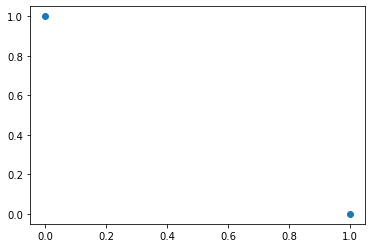

In [164]:
plt.scatter(eigen_matrix[:,0], eigen_matrix[:,1])
plt.show()

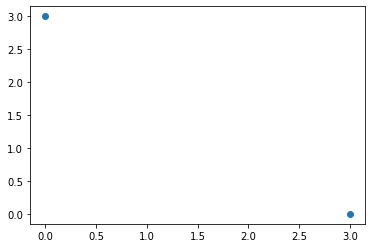

In [165]:
plt.scatter(matrix.mv(eigen_matrix[:,0]), matrix.mv(eigen_matrix[:,1]))
plt.show()

In [169]:
eigen_matrix.mm(torch.diag(torch.tensor([3.0,3]))).mm(eigen_matrix.T) == matrix

tensor([[True, True],
        [True, True]])

In [170]:
torch.svd(matrix) # Eigenvalue decomposition

torch.return_types.svd(
U=tensor([[1., 0.],
        [0., 1.]]),
S=tensor([3., 3.]),
V=tensor([[1., 0.],
        [0., 1.]]))